In [102]:
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
#filterwarnings('ignore')

import numpy as np

df = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/faithful.csv",index_col=0)

In [ ]:
df.head()

Text(0.5, 1.0, 'Visualization of raw data')

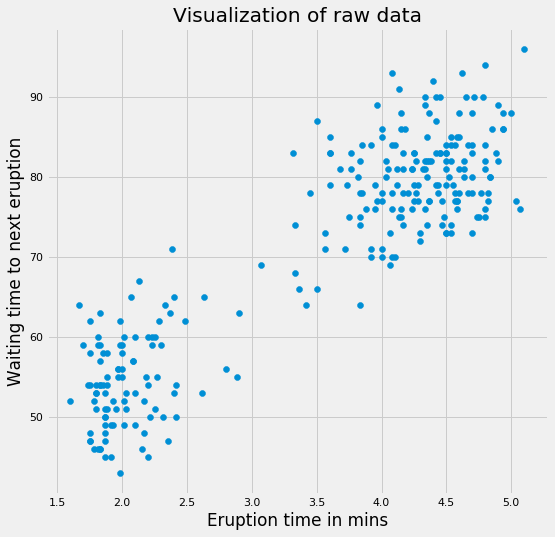

In [104]:
plt.figure(figsize=(8,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

In [105]:
X_std= StandardScaler().fit_transform(df)

cluster=KMeans(n_clusters=2, max_iter=100)
cluster.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

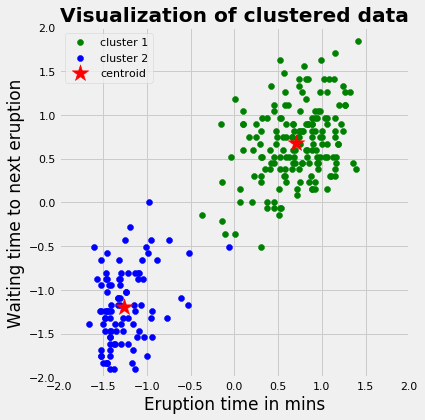

In [106]:
centroids=cluster.cluster_centers_
fig,ax=plt.subplots(figsize=(6,6))
plt.scatter(X_std[cluster.labels_==0,0], X_std[cluster.labels_==0,1], c='green', label='cluster 1')
plt.scatter(X_std[cluster.labels_==1,0], X_std[cluster.labels_==1,1], c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:,1], marker="*", s=300, c='r', label='centroid')
plt.legend()
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

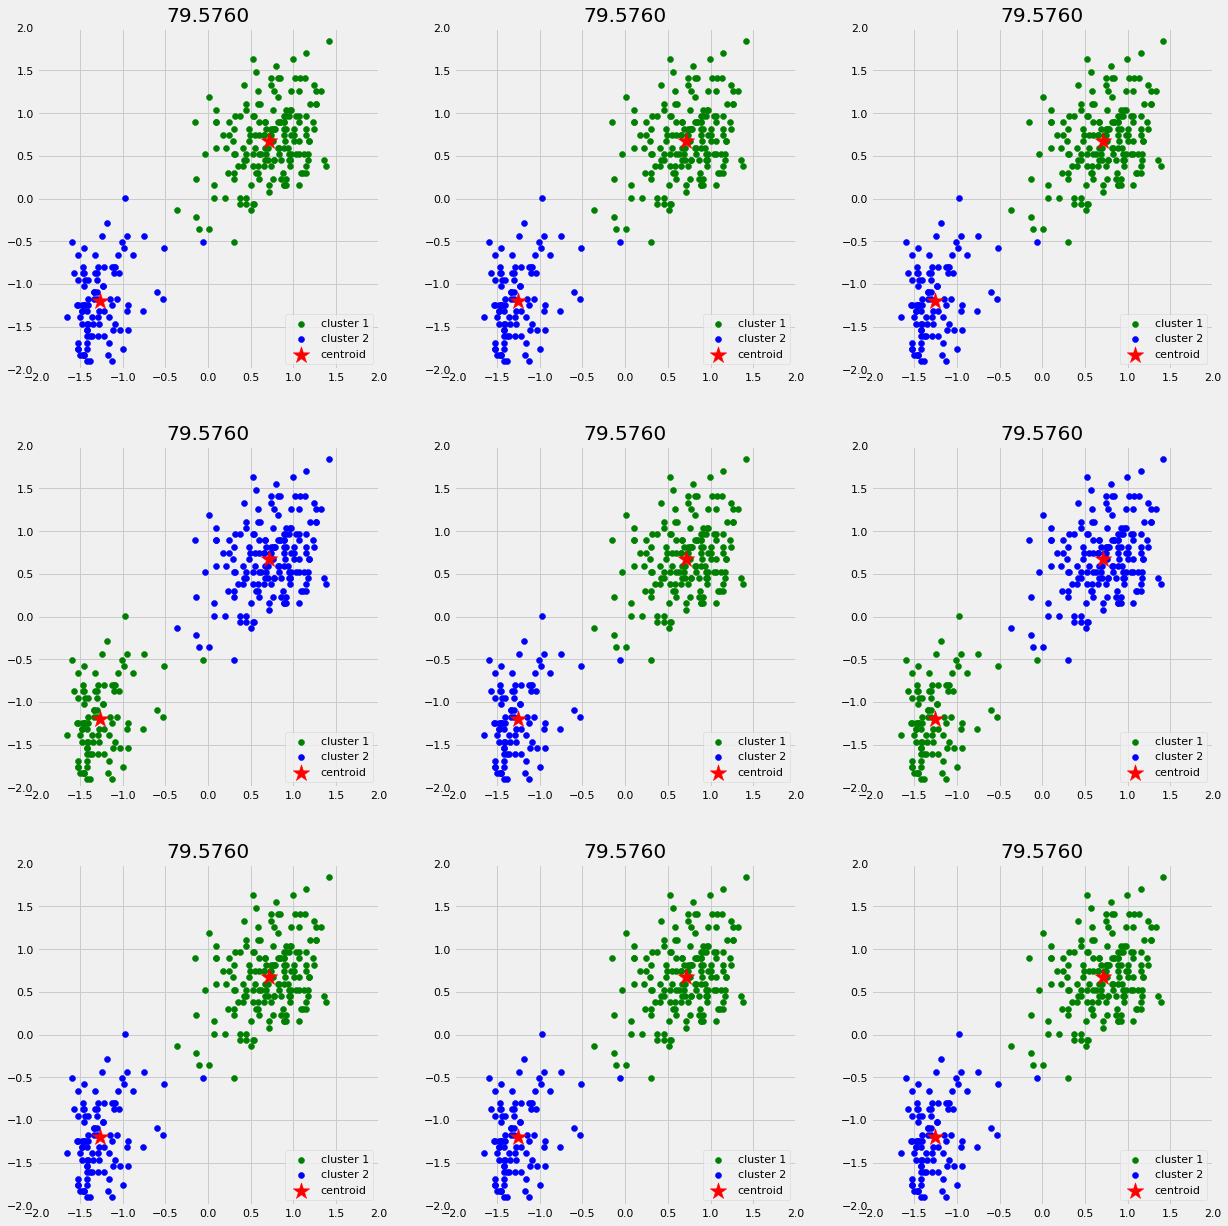

In [107]:
n_iter=9
fig,ax=plt.subplots(3,3,figsize=(18,18))
ax=np.ravel(ax)
center=[]
for i in range(n_iter):
    cluster=KMeans(n_clusters=2, max_iter=3, random_state=np.random.randint(0,1000,size=1)[0])
    cluster.fit(X_std)
    centroids=cluster.cluster_centers_
    center.append(centroids)
    ax[i].scatter(X_std[cluster.labels_==0,0], X_std[cluster.labels_==0,1], c='green', label='cluster 1')
    ax[i].scatter(X_std[cluster.labels_==1,0], X_std[cluster.labels_==1,1], c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:,1], marker="*", s=300, c='r', label='centroid')
    ax[i].set_xlim([-2,2])
    ax[i].set_ylim([-2,2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{cluster.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout(pad=3)
    

In [108]:
cluster=KMeans(n_clusters=2, max_iter=3, random_state=170)
np.random.randint(0,1000,size=1)[0]


682

In [109]:
cluster.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=170, tol=0.0001, verbose=0)

In [97]:
cluster.inertia_

79.57595948827701